In [46]:
# Import data and libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import re
data = pd.read_csv("../../dane.csv")
display(data)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


### Ideas and problems to solve:
- relationship between Age and VIP services
- money that VIPs and other passengers spend on amenities on average
- number of VIPs and other passengers on routes
- number of cabin and side, on which there is the largest number of VIPs
- cryosleep on routes
- best mashine learning model to predict value on transported column

### 1. Relationship between Age and VIP services

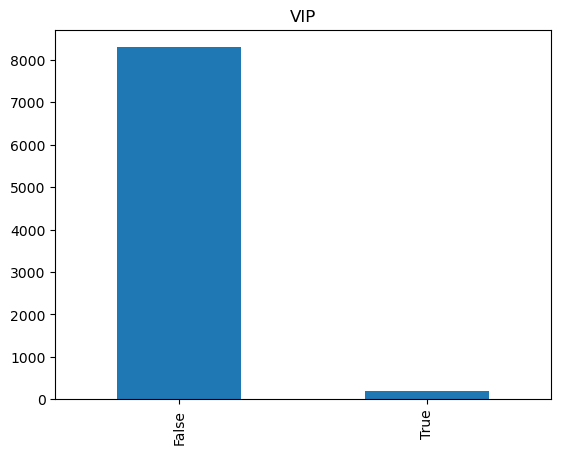

In [47]:
# 1) How many people take VIP?
data['VIP'].value_counts().plot(kind='bar', title='VIP')
plt.show()


,Age Group,Count,VIP,Percentage
0,0-4,321,0,0.0
1,5-9,219,0,0.0
2,10-14,522,0,0.0
3,15-19,1195,3,0.251046
4,20-24,1461,10,0.684463
5,25-29,1207,54,4.473902
6,30-34,898,44,4.899777
7,35-39,782,25,3.196931
8,40-44,580,17,2.931034
9,45-49,414,12,2.898551


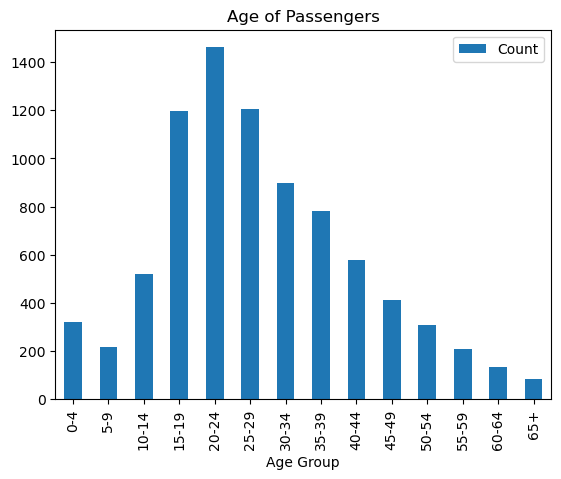

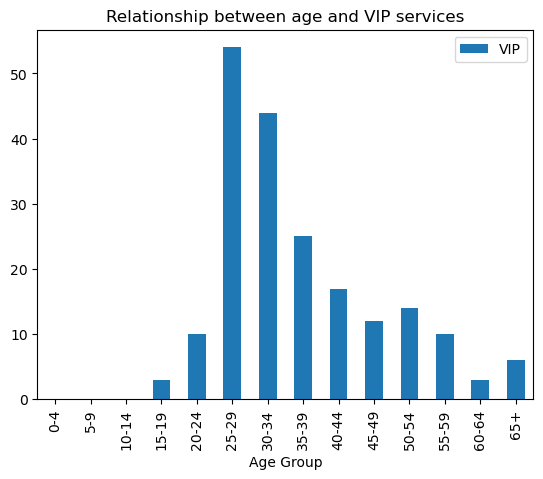

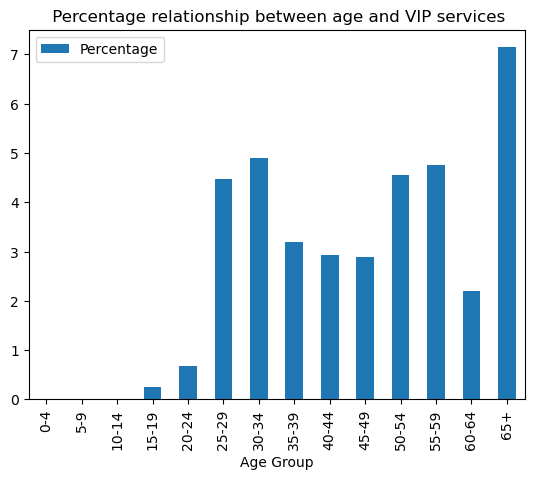

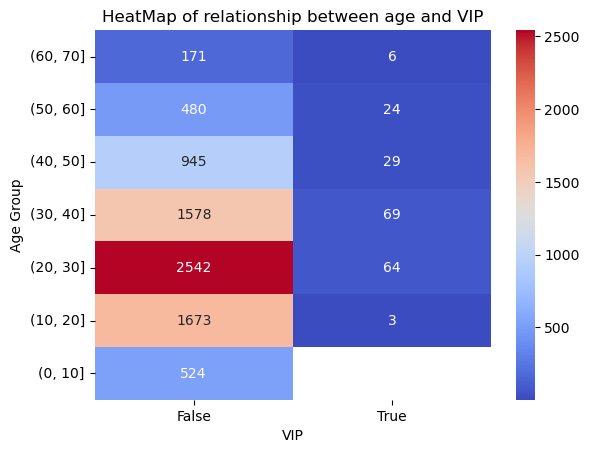

In [48]:
# 2) Which group of age uses VIP services most often?
pr_1 = data.copy()
pr_1 = pr_1[pr_1.Age != None]
pr_1 = pr_1[pr_1.VIP != None]
bins = list(range(0,66,5))
bins.append(80)
labels = [f"{i}-{i+4}" for i in range(0, 65, 5)]
labels.append('65+')
pr_1= pr_1[['PassengerId', 'Age', 'VIP']]
pr_1['Age Group'] = pd.cut(pr_1.Age, bins=bins, labels=labels)
pr = pr_1.groupby('Age Group').size().reset_index()
pr.columns.values[1] = 'Count'
prr = pr_1.groupby('Age Group')['VIP'].sum()
pr_1 = pd.merge(left=pr, right= prr, left_on='Age Group', right_on='Age Group')
pr_1['Percentage'] = (pr_1['VIP']/ pr_1['Count']) * 100 
display(pr_1)
# Age of passengers
pr_1.plot(kind='bar', x = 'Age Group', y = 'Count', title="Age of Passengers")
plt.show()
# relationship between age and VIP services on barplot
pr_1.plot(kind = 'bar', x= 'Age Group', y= 'VIP', title='Relationship between age and VIP services')
plt.show()
pr_1.plot(kind = 'bar', x= 'Age Group', y= 'Percentage', title=' Percentage relationship between age and VIP services')
plt.show()

# on Heatmap
pp = data.copy()
pp = pp.dropna(subset= "Age")
pp = pp[['VIP', 'Age']]
pp['Age Group'] = pd.cut(pp['Age'], bins=[0,10,20,30,40,50,60,70])
heatmapdf=pp.groupby('Age Group')['VIP'].value_counts().unstack()
sns.heatmap(heatmapdf.iloc[::-1], annot=True, cmap="coolwarm", fmt="0.0f")
plt.title("HeatMap of relationship between age and VIP")
plt.show()

### 2. Money that VIPs and other passengers spend on amenities on average


,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,False,217.218527,426.336536,173.876298,301.711045,282.718056
1,True,473.615385,1811.393782,247.726804,760.710660,1234.856410


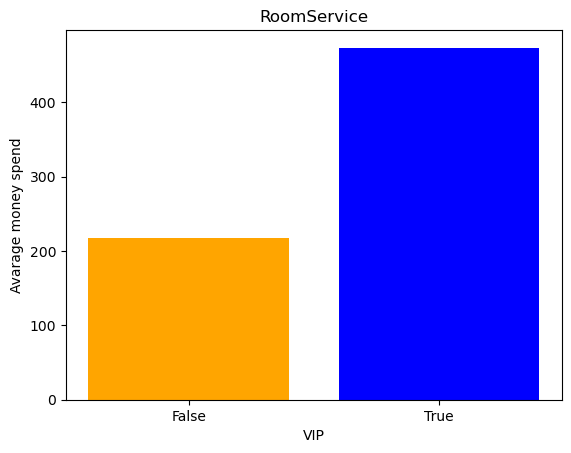

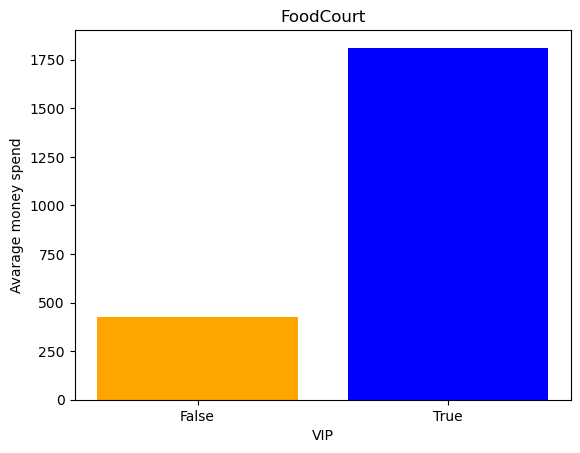

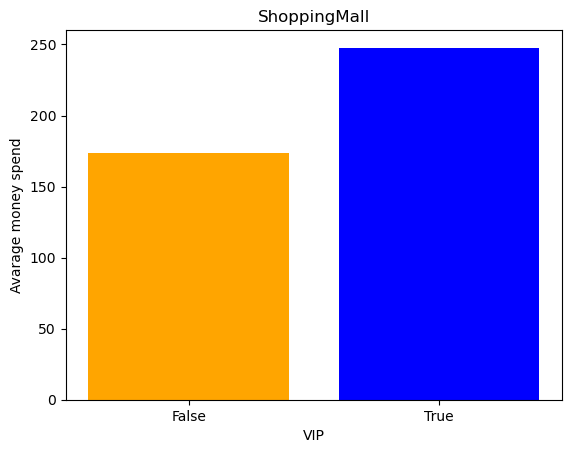

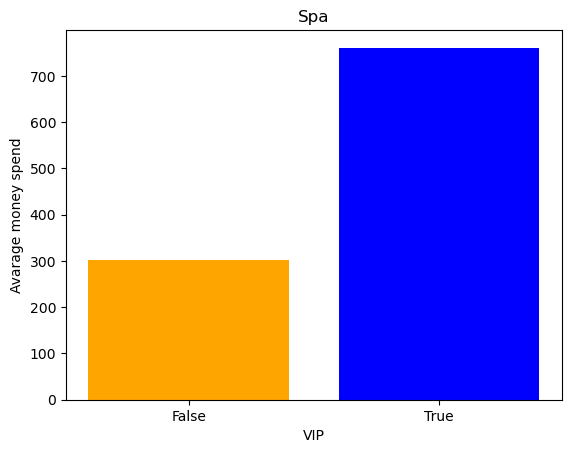

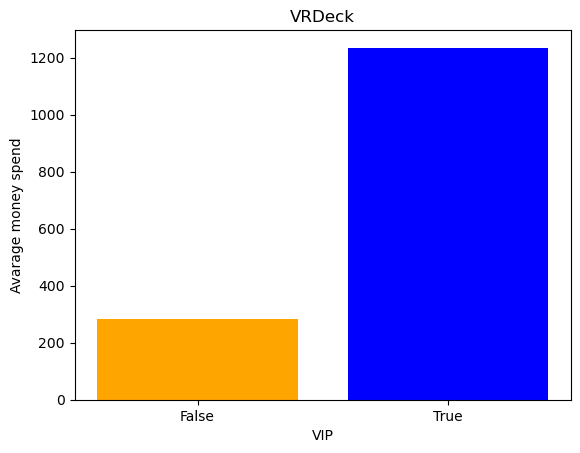

In [49]:
# 3) How much money do VIPs and other passengers spend on amenities on average?
pr_3 = data.copy()
pr_3 = pr_3[['VIP', 'RoomService', 'FoodCourt' ,'ShoppingMall' ,'Spa','VRDeck']]
pr_3 = pr_3[pr_3['VIP'] != None]
pr_3 = pr_3.groupby('VIP').mean()
pr_3.reset_index(inplace=True)
display(pr_3)
for col in pr_3.columns:
    if col == 'VIP':
        continue
    else:
        plt.bar(data= pr_3, x= 'VIP', height = col, color = ['orange', 'blue'])
        plt.title(col)
        plt.ylabel("Avarage money spend")
        plt.xticks([0,1], [False, True])
        plt.xlabel("VIP")
        plt.show()

### 3. Number of VIPs and other passengers on routes

,Route,VIP
0,Europa -> TRAPPIST-1e,False
1,Earth -> TRAPPIST-1e,False
2,Europa -> TRAPPIST-1e,True
3,Europa -> TRAPPIST-1e,False
4,Earth -> TRAPPIST-1e,False
...,...,...
8688,Europa -> 55 Cancri e,True
8689,Earth -> PSO J318.5-22,False
8690,Earth -> TRAPPIST-1e,False
8691,Europa -> 55 Cancri e,False


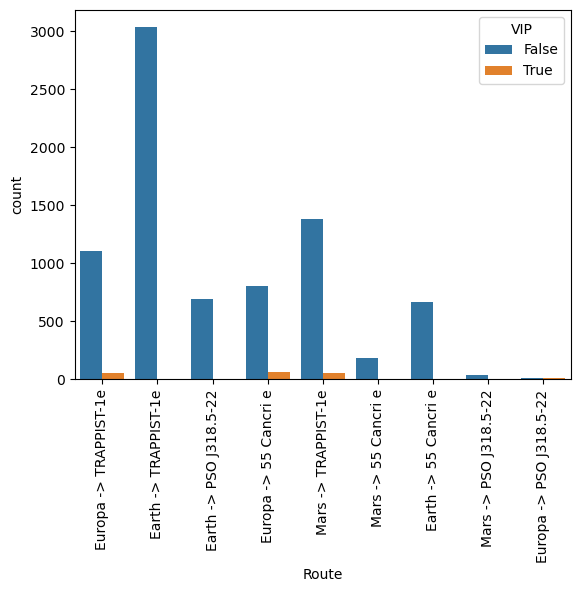

In [50]:
# vip and other passengers on routes
pr_4 = data.copy()
pr_4 = pr_4[pr_4['HomePlanet'] != None]
pr_4 = pr_4[pr_4['Destination'] != None]
pr_4['Route'] = pr_4['HomePlanet'].str.cat(pr_4['Destination'], sep=' -> ')
pr_4 = pr_4[['Route', 'VIP']]
pr_4 = pr_4[pr_4['VIP'] != None]
display(pr_4)
sns.countplot(data= pr_4, x = 'Route', hue='VIP')
plt.xticks(rotation = 90)
plt.show()


### 4. Number of cabin and side, on which there is the largest number of VIPs

,Cabin,VIP
0,B/P,24
1,C/P,21
2,A/S,20
3,C/S,20
4,F/P,19
5,B/S,18
6,D/P,18
7,A/P,15
8,D/S,13
9,E/S,10


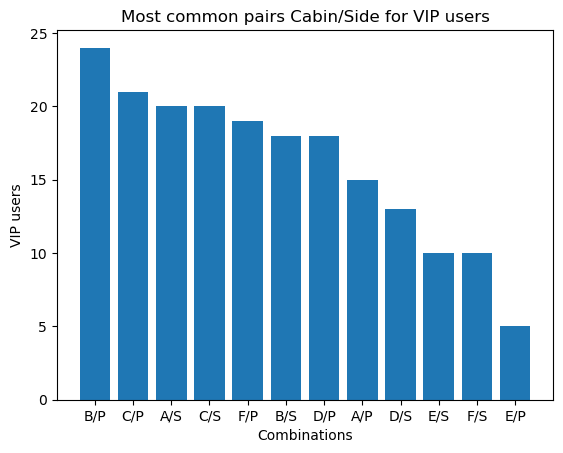

,Cabin_number,Per
0,A,18.134715
1,B,21.761658
2,C,21.243523
3,D,16.062176
4,E,7.772021
5,F,15.025907


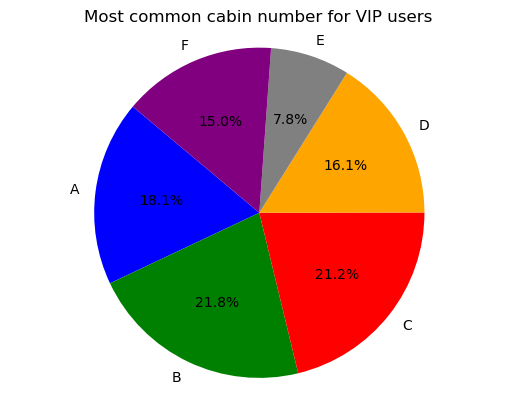

,Side,Per
0,P,52.849741
1,S,47.150259


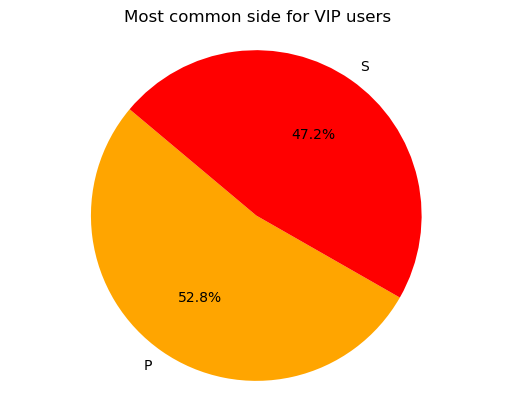

In [51]:
# On which Cabin and side there is the largest number of VIPs
def remove_middle_value(text):
    return re.sub(r'\/\d+\/', '/', text)
pr_5 = data.copy()
pr_5 = pr_5[pr_5['VIP'] == True]
pr_5 = pr_5.dropna(subset= "Cabin")
pr_5 = pr_5[['VIP', 'Cabin']]
pr_5['Cabin'] = pr_5['Cabin'].apply(remove_middle_value)
pr_5 = pr_5.groupby('Cabin').count().reset_index()
pr_5 = pr_5.sort_values(by= 'VIP', ascending= False).reset_index()
pr_5 = pr_5[['Cabin', 'VIP']]
display(pr_5)

non_merge = pr_5.copy()
non_merge['Cabin_number'] = non_merge['Cabin'].str.split('/').str[0]
non_merge['Side'] = non_merge['Cabin'].str.split('/').str[1]
non_merge = non_merge[['VIP', 'Cabin_number', 'Side']]

cabin_df = non_merge.groupby('Cabin_number').sum('VIP').reset_index()
cabin_df['Per'] = (cabin_df['VIP'] / non_merge['VIP'].sum()) * 100
cabin_df = cabin_df[['Cabin_number', 'Per']]

side_df = non_merge.groupby('Side').sum('VIP').reset_index()
side_df['Per'] = (side_df['VIP'] / non_merge['VIP'].sum()) * 100
side_df = side_df[['Side', 'Per']]

plt.bar(data= pr_5, x = 'Cabin', height='VIP')
plt.title("Most common pairs Cabin/Side for VIP users")
plt.xlabel("Combinations")
plt.ylabel("VIP users")
plt.show()
display(cabin_df)

plt.pie(cabin_df['Per'], labels=cabin_df['Cabin_number'], colors=['blue', 'green', 'red', 'orange', 'gray', 'purple'], autopct='%1.1f%%', shadow=False, startangle=140)
plt.title("Most common cabin number for VIP users")
plt.axis('equal')
plt.show()

display(side_df)

plt.pie(side_df['Per'], labels=side_df['Side'], colors=['orange', 'red'], autopct='%1.1f%%', shadow=False, startangle=140)
plt.title("Most common side for VIP users")
plt.axis('equal')
plt.show()



### 5. Cryosleep on routes

,Route,Count,CryoSleep,Percantage
0,Earth -> 55 Cancri e,677,205,30.28065
1,Earth -> PSO J318.5-22,695,355,51.079137
2,Earth -> TRAPPIST-1e,3018,809,26.805832
3,Europa -> 55 Cancri e,861,441,51.219512
4,Europa -> PSO J318.5-22,19,9,47.368421
5,Europa -> TRAPPIST-1e,1158,447,38.601036
6,Mars -> 55 Cancri e,188,76,40.425532
7,Mars -> PSO J318.5-22,47,11,23.404255
8,Mars -> TRAPPIST-1e,1440,561,38.958333


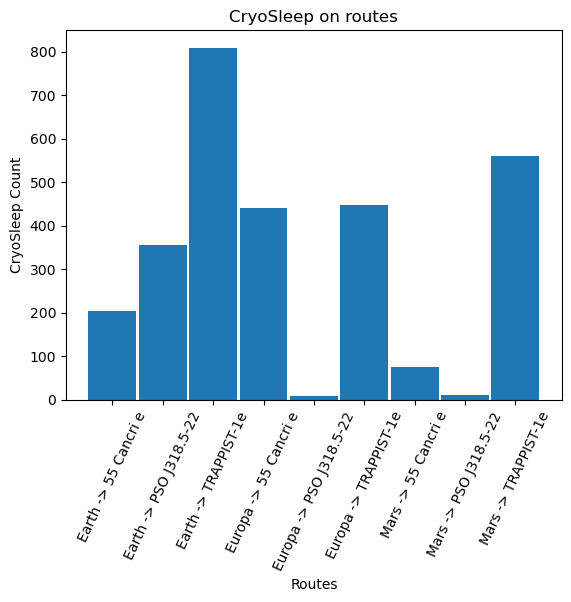

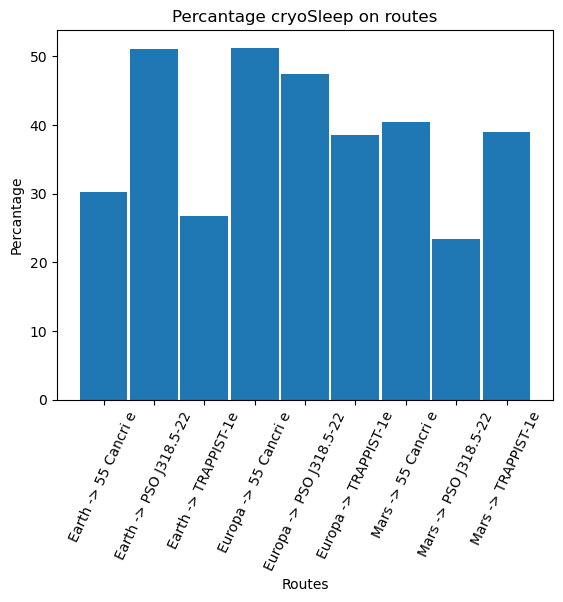

In [52]:
# on which route passegers use Cryosleep option the most often?

pr_2 = data.copy()
pr_2 = pr_2[pr_2.HomePlanet != None]
pr_2 = pr_2[pr_2.Destination != None]
pr_2 = pr_2[pr_2.CryoSleep != None]
pr_2 = pr_2[['HomePlanet', 'Destination', 'CryoSleep']]
routes = pr_2.groupby(['HomePlanet', 'Destination']).count().reset_index()
routes.columns.values[2] = 'Count'
cryo = pr_2.groupby(['HomePlanet', 'Destination'])['CryoSleep'].sum().reset_index()
pr_2 = pd.merge(left=routes, right=cryo, left_on=['HomePlanet', 'Destination'], right_on=['HomePlanet', 'Destination'])
pr_2['Percantage'] = (pr_2['CryoSleep'] / pr_2['Count']) * 100
pr_2['Route'] = pr_2['HomePlanet'].str.cat(pr_2['Destination'], sep=' -> ')
pr_2 = pr_2[['Route', 'Count', 'CryoSleep', 'Percantage']]
display(pr_2)
plt.bar(x = pr_2['Route'], height= pr_2['CryoSleep'], width=0.95)
plt.title("CryoSleep on routes")
plt.xlabel("Routes")
plt.ylabel("CryoSleep Count")
plt.xticks(rotation = 65)
plt.show()
plt.bar(x = pr_2['Route'], height= pr_2['Percantage'], width=0.95)
plt.title("Percantage cryoSleep on routes")
plt.xlabel("Routes")
plt.ylabel("Percantage")
plt.xticks(rotation = 65)
plt.show()



### 6. Best mashine learning model to predict value on transported column

- logistic regresion

In [53]:
data = data.dropna()
X = data.drop('Transported', axis = 1)

y = data.Transported
label_encoder = LabelEncoder()
X['HomePlanet'] = label_encoder.fit_transform(X['HomePlanet'])
X['Destination'] = label_encoder.fit_transform(X['Destination'])
X['CryoSleep'] = label_encoder.fit_transform(X['CryoSleep'])
X['PassengerId'] = label_encoder.fit_transform(X['PassengerId'])
X['Cabin'] = label_encoder.fit_transform(X['Cabin'])
X['Name'] = label_encoder.fit_transform(X['Name'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

model = LogisticRegression()
model.fit(X=X_train, y= y_train)
y_predicted = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted)
print(accuracy)
class_report = classification_report(y_test, y_predicted)
print(class_report)



0.7791225416036308
              precision    recall  f1-score   support

       False       0.81      0.72      0.76       653
        True       0.76      0.83      0.79       669

    accuracy                           0.78      1322
   macro avg       0.78      0.78      0.78      1322
weighted avg       0.78      0.78      0.78      1322



c:\Users\Darek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- Decision Tree Classifier

In [54]:
model1 = DecisionTreeClassifier()
model1.fit(X=X_train, y= y_train)
y_predicted1 = model1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_predicted1)
display(accuracy1)
class_report1 = classification_report(y_test, y_predicted1)
print(class_report1)

0.7382753403933434

              precision    recall  f1-score   support

       False       0.74      0.72      0.73       653
        True       0.74      0.75      0.74       669

    accuracy                           0.74      1322
   macro avg       0.74      0.74      0.74      1322
weighted avg       0.74      0.74      0.74      1322



- Gradient Boosting Classifier

In [55]:
model2 = GradientBoostingClassifier()
model2.fit(X=X_train, y= y_train)
y_predicted2 = model2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_predicted2)
display(accuracy2)
class_report2 = classification_report(y_test, y_predicted2)
print(class_report2)

0.8033282904689864

              precision    recall  f1-score   support

       False       0.82      0.76      0.79       653
        True       0.79      0.84      0.81       669

    accuracy                           0.80      1322
   macro avg       0.81      0.80      0.80      1322
weighted avg       0.80      0.80      0.80      1322



- SVC

In [56]:
model3 = SVC()
model3.fit(X=X_train, y= y_train)
y_predicted3 = model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_predicted2)
display(accuracy3)
class_report3 = classification_report(y_test, y_predicted3)
print(class_report3)

0.8033282904689864

              precision    recall  f1-score   support

       False       0.87      0.65      0.74       653
        True       0.73      0.91      0.81       669

    accuracy                           0.78      1322
   macro avg       0.80      0.78      0.78      1322
weighted avg       0.80      0.78      0.78      1322



- KNeighbors Classifier (KNN)

In [57]:
model4 = KNeighborsClassifier()
model4.fit(X=X_train, y= y_train)
y_predicted4 = model4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_predicted4)
display(accuracy4)
class_report4 = classification_report(y_test, y_predicted2)
print(class_report4)

c:\Users\Darek\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7488653555219364

              precision    recall  f1-score   support

       False       0.82      0.76      0.79       653
        True       0.79      0.84      0.81       669

    accuracy                           0.80      1322
   macro avg       0.81      0.80      0.80      1322
weighted avg       0.80      0.80      0.80      1322



- Result:

,Model,Accuracy
0,LogisticRegression,77.912254
1,DecisionTree,73.827534
2,GradientBoosting,80.332829
3,SVC,80.332829
4,KNeighbors,74.886536


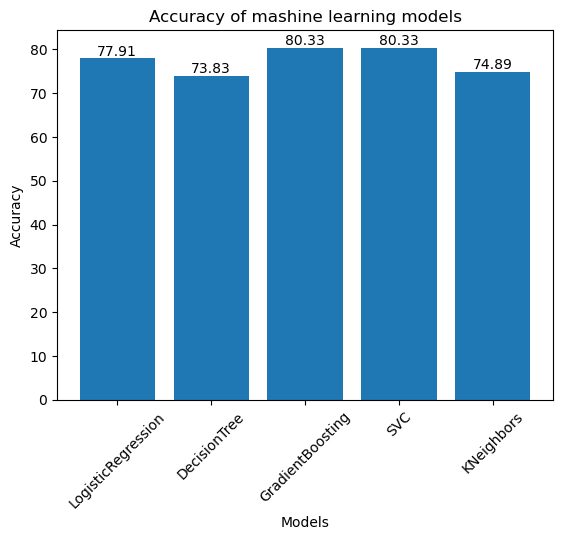

In [58]:
data_models = {
    "Model" : ["LogisticRegression", "DecisionTree", "GradientBoosting", "SVC", "KNeighbors"],
    "Accuracy": [accuracy, accuracy1, accuracy2, accuracy3, accuracy4]
}
data_models = pd.DataFrame(data_models)
data_models["Accuracy"] = data_models["Accuracy"] * 100
display(data_models)

bars = plt.bar(data= data_models, x = 'Model', height=round(data_models['Accuracy'],2))

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')
plt.title("Accuracy of mashine learning models")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation = 45)
plt.show()